In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

In [2]:
from src.predict import inference
from src.dataset import get_load_data
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

In [3]:
_, val_set = get_load_data(root = "../../data", dataset = "MNIST")
val_dataloader = DataLoader(val_set, batch_size=1, shuffle = True)
img = next(iter(val_dataloader))[0]

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data\MNIST\raw\train-images-idx3-ubyte.gz to ../../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data\MNIST\raw



In [4]:
trained_model_path = "../model_weights/vae_mnist.pt"

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(trained_model_path, map_location=torch.device(device))

In [5]:
results = inference(model, img.to(device))
img_to_show = results[0].detach().cpu().numpy()

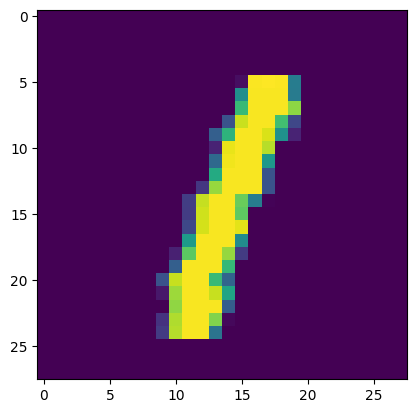

In [6]:
img_gt_to_show = img.squeeze(0).detach().cpu().numpy()
plt.imshow(img_gt_to_show.transpose(1,2,0))
plt.show()

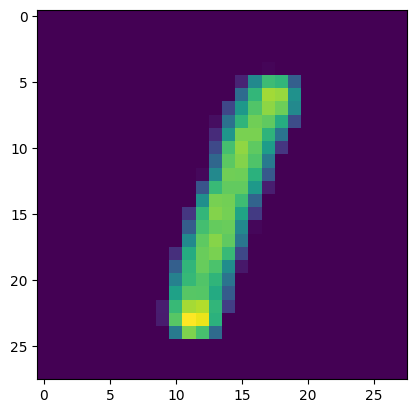

In [7]:
plt.imshow(img_to_show.transpose(1,2,0))
plt.show()